# Regressors Practice

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [9]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target

In [10]:
y = boston_df['PRICE']
X = boston_df.drop(['PRICE'], axis=1, inplace=False)

## Random Forest Regressor

In [16]:
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("RMSE: ",np.round(rmse_scores, 2))
print("avg_RMSE: ",np.round(avg_rmse, 2))

RMSE:  [2.82 3.61 4.53 6.8  4.34]
avg_RMSE:  4.42


## Build Function 'get_model_cv_prediction'

In [17]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ', model.__class__.__name__,'#####')
    print('5-fold-CV AVG REMS: {:.3f}'.format(avg_rmse))

## Import various regressors

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)



In [22]:
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
    get_model_cv_prediction(model, X, y)

#####  DecisionTreeRegressor #####
5-fold-CV AVG REMS: 5.978
#####  RandomForestRegressor #####
5-fold-CV AVG REMS: 4.420
#####  GradientBoostingRegressor #####
5-fold-CV AVG REMS: 4.272
[16:18:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:18:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:18:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:18:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:18:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor #####
5-fold-CV AVG REMS: 4.089
#####  LGBMRegressor #####
5-fold-CV AVG REMS: 4.646


## Features importances (Random Forest EX)

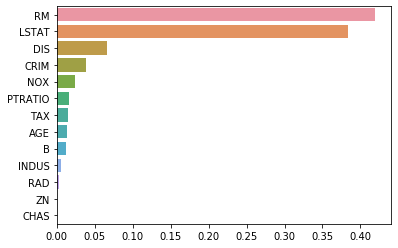

In [23]:
import seaborn as sns

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X, y)

# Feature importances using model_instance.feature_importances_
feature_series = pd.Series(data=rf_reg.feature_importances_, index=X.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

## See how regressors work

(100, 2)


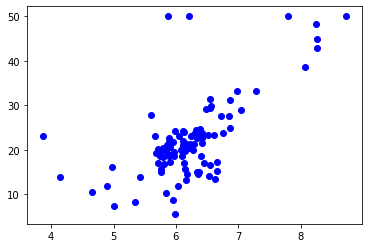

In [25]:
boston_df_sample = boston_df[['RM', 'PRICE']]
boston_df_sample = boston_df_sample.sample(n=100, random_state=0)
print(boston_df_sample.shape)
plt.figure()
plt.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='blue')

In [26]:
from sklearn.linear_model import LinearRegression

In [37]:
lr_reg = LinearRegression()
dt_reg2 = DecisionTreeRegressor(max_depth=2)
dt_reg7 = DecisionTreeRegressor(max_depth=7)

In [38]:
# Generate artificial test set
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)
#X_test

In [39]:
X_feature = boston_df_sample['RM'].values.reshape(-1, 1)
y_target = boston_df_sample['PRICE'].values.reshape(-1,1)

In [40]:
lr_reg.fit(X_feature, y_target)
dt_reg2.fit(X_feature, y_target)
dt_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_dt2 = dt_reg2.predict(X_test)
pred_dt7 = dt_reg7.predict(X_test)

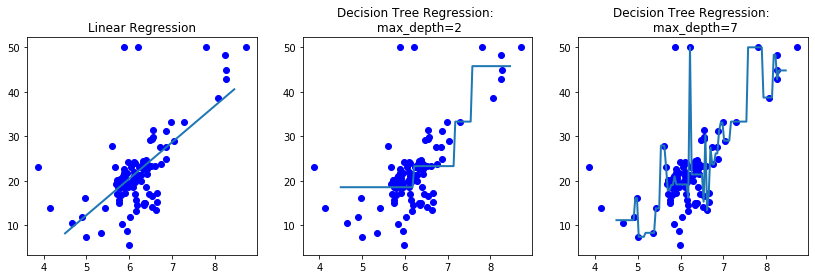

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='blue')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='blue')
ax2.plot(X_test, pred_dt2, label='max_depth:2', linewidth=2)

ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='blue')
ax3.plot(X_test, pred_dt7, label='max_depth:7', linewidth=2)

### Linear Regression has a straight line, Decision Tree models have step-line, but max_depth=7 model is overfitted. 